In [57]:
import pandas as pd
import numpy as np

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Load Data
data= pd.read_csv("liver_disease.csv")

In [61]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [62]:
print(data.shape)

(583, 11)


In [63]:
print(data.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [64]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [65]:
# Check missing values & target distribution
print(data.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [66]:
data = data.fillna("None")

In [67]:
print(data.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [68]:
# Check Duplicates
duplicates = data[data.duplicated()]
print("Total duplicate rows:",len(duplicates))

Total duplicate rows: 13


In [69]:
data = data.drop_duplicates()

In [70]:
print("New shape after removing duplicates:", data.shape)

New shape after removing duplicates: (570, 11)


In [71]:
duplicates = data[data.duplicated()]
print("Total duplicate rows:",len(duplicates))

Total duplicate rows: 0


In [72]:
counts = data['Dataset'].value_counts()
print(counts)

Dataset
1    406
2    164
Name: count, dtype: int64


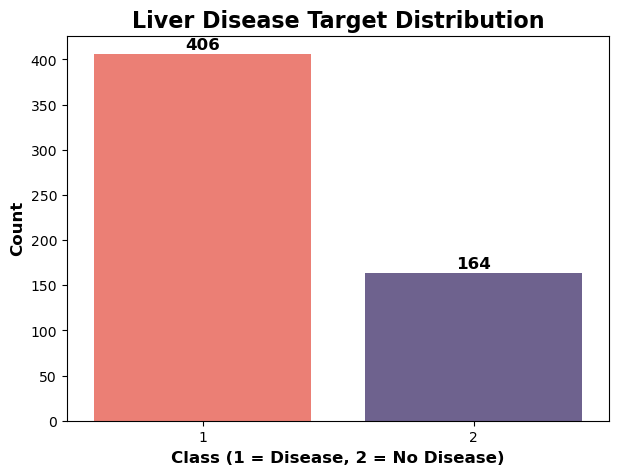

In [73]:
colors = ["#FF6F61", "#6B5B95"]

plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts.values, palette=colors)

plt.title("Liver Disease Target Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Class (1 = Disease, 2 = No Disease)", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

for i, val in enumerate(counts.values):
    plt.text(i, val + 5, str(val), ha='center', fontsize=12, fontweight='bold')

plt.show()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import joblib
import os


In [86]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].astype(str)

In [87]:
import pandas as pd

data = pd.read_csv("liver_disease.csv")   # use your file name
X = data.drop("Dataset", axis=1)
y = data["Dataset"]

# 1. Separate numeric and categorical features
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

Numeric features: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
Categorical features: ['Gender']


In [88]:
# Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # fill NaN with median
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),  # fill NaN with "None"
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine
preproc = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 80% train, 20% test
    stratify=y,            # keeps class distribution same
    random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Attrition rate in training set:")
print(y_train.value_counts(normalize=True))

Train shape: (466, 10) (466,)
Test shape: (117, 10) (117,)
Attrition rate in training set:
Dataset
1    0.714592
2    0.285408
Name: proportion, dtype: float64


In [90]:
#- baseline pipeline
clf = Pipeline([
    ('preproc', preproc),
    ('clf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

# fit
clf.fit(X_train, y_train)
print("Baseline trained.")

Baseline trained.


In [91]:
#- evaluation
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           1       0.72      0.84      0.78        83
           2       0.35      0.21      0.26        34

    accuracy                           0.66       117
   macro avg       0.54      0.52      0.52       117
weighted avg       0.61      0.66      0.63       117

ROC AUC: 0.6814316087880936


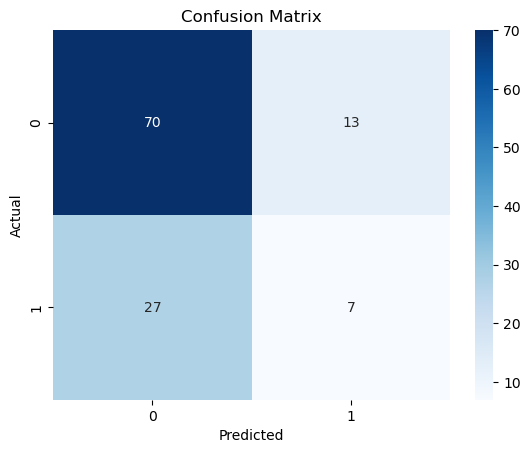

In [92]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

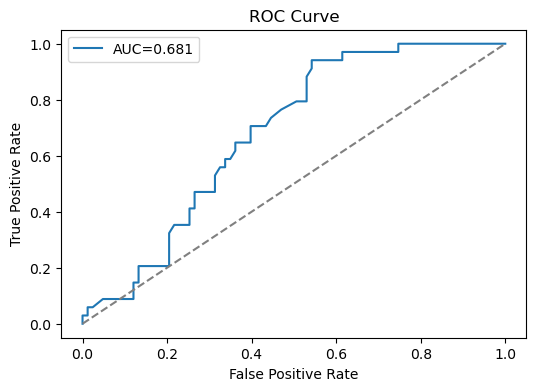

In [93]:
import numpy as np

y_test_binary = np.where(y_test == 2, 1, 0)   # convert {1,2} → {0,1}

fpr, tpr, _ = roc_curve(y_test_binary, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test_binary, y_proba):.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [94]:
# - randomized search (faster than grid)
param_dist = {
    'clf__n_estimators': [100, 200, 400],
    'clf__max_depth': [None, 8, 16, 32],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
search = RandomizedSearchCV(clf, param_dist, n_iter=20, scoring='roc_auc',
                            cv=cv, n_jobs=-1, random_state=42, verbose=1)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)
best_model = search.best_estimator_

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best params: {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': None}


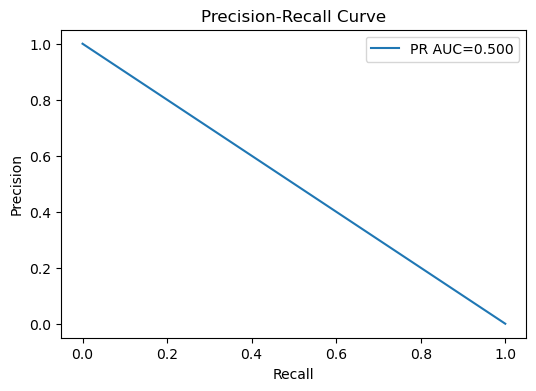

In [96]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_proba_best = best_model.predict_proba(X_test)[:,1]

prec, rec, _ = precision_recall_curve(y_test, y_proba_best, pos_label='ckd')  # specify positive class
pr_auc = auc(rec, prec)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR AUC={pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [97]:
# get feature names (scikit-learn >=1.0 supports get_feature_names_out)
pre = best_model.named_steps['preproc']
try:
    # if you pass original columns, get readable names
    feature_names = pre.get_feature_names_out(X_train.columns)
except Exception:
    # fallback - best-effort
    # numeric names + onehot categories (for older sklearn this is a bit more manual)
    feature_names = []
    # numeric:
    if hasattr(pre, 'transformers_'):
        for name, trans, cols in pre.transformers_:
            if name == 'num':
                feature_names.extend(cols)
            elif name == 'cat':
                # get categories from fitted onehot
                ohe = trans.named_steps['onehot']
                cats = ohe.get_feature_names_out(cols)
                feature_names.extend(cats)
print("Number of features after transform:", len(feature_names))

Number of features after transform: 11


In [98]:
# - saving
os.makedirs("models", exist_ok=True)
# save best_model (pipeline includes preproc)
joblib.dump(best_model, "models/liver_pipeline_best.joblib")
print("Saved models/liver_pipeline_best.joblib")
# If you want to save preprocessor and classifier separately:
joblib.dump(best_model.named_steps['preproc'], "models/preprocessor_liver.joblib")
joblib.dump(best_model.named_steps['clf'], "models/liver_clf_only.joblib")

Saved models/liver_pipeline_best.joblib


['models/liver_clf_only.joblib']